# 1. import libraries

In [1]:
# data manipulation and plotting tools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# data processing
from category_encoders.one_hot import OneHotEncoder
from category_encoders.ordinal import OrdinalEncoder
from category_encoders.target_encoder import TargetEncoder
from sklearn.preprocessing import MinMaxScaler, RobustScaler,LabelEncoder

# algorithms
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# model selection tools
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# metrics
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

# explainability
import shap

#visual
import seaborn as sns

#MostrarMas
pd.set_option('display.max_columns', None)

In [2]:
#pip install --upgrade category_encoders

In [3]:
pip install --upgrade category_encoders

Note: you may need to restart the kernel to use updated packages.


# 2. Load the dataset

In [10]:
data = pd.read_csv('churn.csv')

In [9]:
data.head()


,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,City,Zip Code,Latitude,Longitude,Population,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,Los Angeles,90022,34.023810,-118.156582,68701,Q3,No,0,1,NaN,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,Los Angeles,90063,34.044271,-118.185237,55668,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,Los Angeles,90065,34.108833,-118.229715,47534,Q3,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,52,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,Inglewood,90303,33.936291,-118.332639,27778,Q3,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,12,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,Whittier,90602,33.972119,-118.020188,26265,Q3,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Fiber Optic,14,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Under 30                           7043 non-null   object 
 4   Senior Citizen                     7043 non-null   object 
 5   Married                            7043 non-null   object 
 6   Dependents                         7043 non-null   object 
 7   Number of Dependents               7043 non-null   int64  
 8   Country                            7043 non-null   object 
 9   State                              7043 non-null   object 
 10  City                               7043 non-null   object 
 11  Zip Code                           7043 non-null   int64

# 3. Data Splitting

In [6]:
#X = data.drop("Churn Label", axis=1) 
#y = data["Churn Label"]

##Decidimos que es mejor despues

In [7]:
#X_trainin, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Exploratory Data Analysis

In [12]:
# Your code here. Exploratory data analysis can be done before splitting, but do not transform the dataset before splitting.
data.info() #No valores nulos 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Under 30                           7043 non-null   object 
 4   Senior Citizen                     7043 non-null   object 
 5   Married                            7043 non-null   object 
 6   Dependents                         7043 non-null   object 
 7   Number of Dependents               7043 non-null   int64  
 8   Country                            7043 non-null   object 
 9   State                              7043 non-null   object 
 10  City                               7043 non-null   object 
 11  Zip Code                           7043 non-null   int64

In [19]:
missing_percentage_Offer = (data['Offer'].isnull().sum() / len(data)) * 100
print(f"Porcentaje de valores faltantes en la columna 'Offer': {missing_percentage_Offer:.2f}%")

Porcentaje de valores faltantes en la columna 'Offer': 55.05%


In [20]:
missing_percentage_Internet_Type = (data['Internet Type'].isnull().sum() / len(data)) * 100
print(f"Porcentaje de valores faltantes en la columna 'Internet Type': {missing_percentage_Internet_Type:.2f}%")

Porcentaje de valores faltantes en la columna 'Internet Type': 21.67%


In [21]:
#Estructura de los datos y resumen:  El dataset original tiene 50 columnas,
#con variables de datos demográficos, geográficas, con información sobre los servicios,
#datos financieros, y satisfacción y comportamiento del cliente.
#Análisis de datos faltantes: Las siguientes columnas tienen valores faltantes:  Offer (55,05%)  e Internet Type (21,67%) 
#Esta información está relacionada con los clientes que se han dado de baja, y se van a ir evaluando a medida que 
#se realice el estudio del dataset

C:\Users\Soraya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


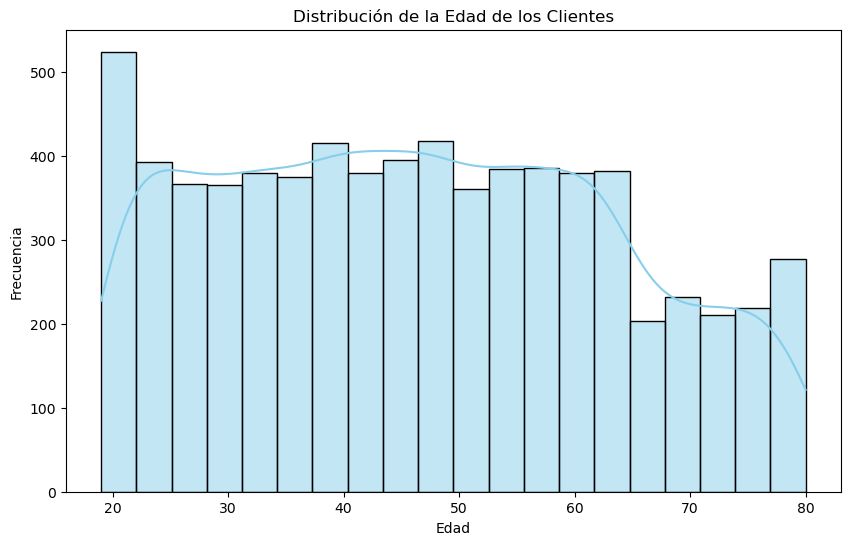

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribución de la Edad de los Clientes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

In [23]:
mean_age = data['Age'].mean()
print(f"La media de la edad es: {mean_age}")

La media de la edad es: 46.50972596904728


In [25]:
#Los rangos de edad están desde los 19 a 80 años, siendo la media alrededor de los 46.50 años

C:\Users\Soraya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


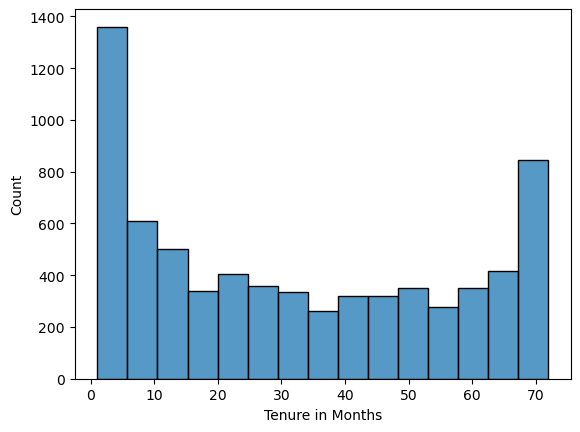

In [15]:
sns.histplot(data['Tenure in Months'])
plt.show()

In [ ]:
data['Tenure in Months'].describe()

In [ ]:
sns.histplot(data["Number of Dependents"])
plt.show()


In [ ]:
data["Multiple Lines"].value_counts(normalize=True)

In [ ]:
data["Satisfaction Score"].value_counts()

In [ ]:
data["Customer Status"].value_counts

In [ ]:
data["Customer Status"].value_counts(normalize="True")

In [ ]:
data["Churn Label"].value_counts(normalize="True")

In [ ]:
data["Payment Method"].value_counts(normalize=True) ##Mas de la mitad son por Bank

In [ ]:
data[(data["Total Refunds"]!=0) & (data["Churn Label"]=="Yes")] ## Ver cuan relacionado esta que haya reembolsos con el churn

In [ ]:
value_counts = data["Total Extra Data Charges"].value_counts()

# Convierte el resultado de value_counts a un DataFrame para facilitar la visualización
df = value_counts.reset_index()
df.columns = ['Total Extra Data Charges', 'Count']
df

In [ ]:
plt.figure(figsize=(15, 6))  # Ajusta el valor 15 para hacerla aún más ancha si lo necesitas
plt.bar(df['Total Extra Data Charges'], df['Count'], color='skyblue')
plt.xlabel('Total Extra Data Charges')
plt.ylabel('Count')
plt.title('Distribution of Total Extra Data Charges')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
sns.histplot(data["Total Extra Data Charges"], bins=140)
plt.show()

In [ ]:
sns.histplot(data['Total Charges'])
plt.show()

In [ ]:
sns.histplot(data['Total Revenue'])
plt.show()

In [ ]:
data["Referred a Friend"].value_counts()

In [ ]:
sns.histplot(data['Satisfaction Score'],bins = 5) ## por lo general es una satisfaccion alta
plt.show()

In [ ]:
data["Premium Tech Support"].value_counts()

In [ ]:
contingency_table = pd.crosstab(data['Premium Tech Support'], data['Churn Label'])
print(contingency_table)

In [ ]:
data['Country'].value_counts()

In [ ]:
columns_to_analyze = [
    'Offer', 
    'Phone Service', 
    'Avg Monthly Long Distance Charges', 
    'Multiple Lines', 
    'Internet Service', 
    'Avg Monthly GB Download', 
    'Online Security'
]

In [ ]:
filtered_data = data[columns_to_analyze]

In [ ]:
filtered_data_summary = filtered_data.describe(include='all')

filtered_data_summary

In [ ]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
# 1. Gráfico de barras para Offer y Phone Service
sns.countplot(ax=axes[0, 0], data=filtered_data, x='Offer', hue='Phone Service')
axes[0, 0].set_title('Distribución de Ofertas según el Servicio de Teléfono')
axes[0, 0].set_ylabel('Cantidad de clientes')
axes[0, 0].set_xlabel('Oferta')

# 2. Gráfico de violín para Internet Service y Avg Monthly GB Download
sns.violinplot(ax=axes[0, 1], data=filtered_data, x='Internet Service', y='Avg Monthly GB Download')
axes[0, 1].set_title('Relación entre Servicio de Internet y GB Descargados')
axes[0, 1].set_ylabel('Promedio de GB descargados mensualmente')
axes[0, 1].set_xlabel('Servicio de internet')

# 3. Gráfico de dispersión para Avg Monthly Long Distance Charges y Multiple Lines
sns.boxplot(ax=axes[1, 0], data=filtered_data, x='Multiple Lines', y='Avg Monthly Long Distance Charges')
axes[1, 0].set_title('Distribución de cargos larga distancia por múltiples líneas')
axes[1, 0].set_ylabel('Cargos mensuales por larga distancia')
axes[1, 0].set_xlabel('Múltiples líneas')

# 4. Gráfico de caja para Online Security y Avg Monthly GB Download
sns.boxplot(ax=axes[1, 1], data=filtered_data, x='Online Security', y='Avg Monthly GB Download')
axes[1, 1].set_title('Relación entre Seguridad en Línea y GB Descargados')
axes[1, 1].set_ylabel('Promedio de GB descargados mensualmente')
axes[1, 1].set_xlabel('Seguridad en línea')

plt.tight_layout()
plt.show()

In [ ]:
# 1
# Distribución de Ofertas según el Servicio de Teléfono: 
# La mayoría de los clientes no tienen ninguna oferta activa ("None")
# para quienes tienen servicio de teléfono como para los que no lo tienen
# los clientes con servicio de teléfono son más en todas las categorías de oferta
# 2
# Relación entre el Servicio de Internet y los GB Descargados: 
# Los clientes con servicio de internet muestran una amplia distribución en la cantidad de GB descargados por mes
# la mediana está en 17 GB
# los que no tienen servicio de internet muestran valores cercanos a 0 GB
# 3
# Distribución de Cargos de Larga Distancia por Múltiples Líneas: 
# Los clientes con múltiples líneas suelen tener cargos de larga distancia un poco más altos 
# comparando con los que no tienen múltiples líneas
# los cargos están bien distribuidos en las categorías
# 4
# Relación entre Seguridad en Línea y GB Descargados: 
# Los clientes que no tienen seguridad en línea tienden a descargar más GB mensualmente en comparación con los que sí 
# los clientes que buscan mayor seguridad en línea no utilizan tanto la capacidad de internet

# 5. Data Processing

## Data Cleaning

In [ ]:
# Your code here
data.info()
ColumnsDrop=["Customer ID","Under 30","Senior Citizen","Country","State","City","Latitude","Longitude","Quarter","Churn Category","Churn Score","CLTV","Churn Reason","Customer Status"]

In [ ]:
data = data.drop(ColumnsDrop,axis=1)

In [ ]:
data.info()

In [ ]:
data["Contract"].value_counts()

In [ ]:
 ## Limpiar los datos Internet Type, offer
data["Internet Type"].value_counts()

In [ ]:
data["Internet Type"].isnull().sum()

In [ ]:
data[(data["Internet Type"].isnull())&((data["Internet Service"]==0))]

In [ ]:
data['Internet Type'] = data['Internet Type'].fillna("No Internet")
data["Internet Type"].isnull().sum()

In [ ]:
data["Offer"].value_counts()

In [ ]:
data["Offer"].isnull().sum()

In [ ]:
data['Offer'] = data['Offer'].fillna("No Offer")

In [ ]:
data["Offer"].isnull().sum()

## Re-sampling (if needed)

In [ ]:

data["Churn Label"].value_counts(normalize=True)
##No necesario el re-sampling
## Hay suficientos datos para que el programa aprenda


## Feature Engineering

In [ ]:
# Your code here


In [ ]:
data["Payment Method"].value_counts()

## Encoding

In [ ]:
labelEncoderColumns = ["Paperless Billing","Churn Label","Gender","Married","Dependents","Referred a Friend","Phone Service","Multiple Lines","Internet Service","Online Security","Online Backup","Device Protection Plan","Premium Tech Support","Streaming TV","Streaming Movies","Streaming Music","Unlimited Data"]
OneHotEncoderColumns = ["Offer","Internet Type","Contract","Payment Method"]

#Offer,Internet Type,Contract,Payment Method


In [ ]:
label_encoder = LabelEncoder()

In [ ]:
for col in labelEncoderColumns:
    data[col] = label_encoder.fit_transform(data[col])


In [ ]:
print(label_encoder.classes_)

In [ ]:
data.info()

In [ ]:
oh_encoder = OneHotEncoder(cols = OneHotEncoderColumns, use_cat_names=True)

In [ ]:
oh_encoder.fit(data)

In [ ]:
data = oh_encoder.transform(data)

In [ ]:
data.columns

In [ ]:
data.info()

columnas = ["Gender","Age","Married","Number of Dependents","Referred a Friend","Tenure in Months"]

columnasModelo = ['Gender', 'Age', 'Married', 'Number of Dependents',
        'Referred a Friend',
       'Tenure in Months', 'Offer_No Offer', 'Offer_Offer E', 'Offer_Offer D',
       'Offer_Offer C', 'Offer_Offer B', 'Offer_Offer A', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type_DSL', 'Internet Type_Fiber Optic',
       'Internet Type_Cable', 'Internet Type_No Internet',
       'Avg Monthly GB Download', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data',
       'Contract_Month-to-Month', 'Contract_One Year', 'Contract_Two Year',
       'Paperless Billing', 'Payment Method_Bank Withdrawal',
       'Payment Method_Credit Card', 'Payment Method_Mailed Check',
       'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score', 'Churn Label']

In [ ]:
data["Churn Label"].info()

## Scaling (if needed)

In [ ]:
scaler = RobustScaler()

In [ ]:
#scaler.fit(X)

### DATA splitting


In [ ]:
columnasModelo = ['Gender', 'Age', 'Married', 'Number of Dependents',
        'Referred a Friend', 'Tenure in Months', 'Offer_None', 'Offer_Offer E', 'Offer_Offer D',
       'Offer_Offer C', 'Offer_Offer B', 'Offer_Offer A', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type_DSL', 'Internet Type_Fiber Optic',
       'Internet Type_Cable', 'Internet Type_None',
       'Avg Monthly GB Download', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data',
       'Contract_Month-to-Month', 'Contract_One Year', 'Contract_Two Year',
       'Paperless Billing', 'Payment Method_Bank Withdrawal',
       'Payment Method_Credit Card', 'Payment Method_Mailed Check',
       'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
        'Satisfaction Score', 'Churn Label']

# 5. Train model/Tune hyperparameters

In [ ]:
print(data.columns)

In [ ]:
columnasModelo = [col for col in columnasModelo if col in data.columns]

In [ ]:
X = data[columnasModelo]
y = data["Churn Label"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Decision Tree Classifier

In [ ]:
model = DecisionTreeClassifier()

In [ ]:
model.fit(X=X,y=data["Churn Label"])

In [ ]:
plt.figure(figsize=(7, 7))
plot_tree(model, feature_names=X.columns, class_names=["no churn", "churn"])

In [ ]:
#alta pureza en nuestro arbol de decision. Cada hoja alcanza a tener cero.

In [ ]:
predicted_prob = model.predict_proba(X)

In [ ]:
predicted_prob

In [ ]:
predicted_class = model.predict(X)

In [ ]:
predicted_class

In [ ]:
data_and_predictions = data.copy()
data_and_predictions

In [ ]:
data_and_predictions["predicted_class"] = predicted_class
data_and_predictions["predicted_prob(no churn)"] = predicted_prob[:,0]
data_and_predictions["predicted_prob(churn)"] = predicted_prob[:,1]

In [ ]:
def calculate_accuracy(predictions):
    number_of_hits = (predictions["Churn Label"] == predictions["predicted_class"]).sum()
    number_of_predictions = len(predictions)

    accuracy = round(number_of_hits/number_of_predictions*100, 2)
    accuracy = float(accuracy)

    return accuracy

In [ ]:
calculate_accuracy(data_and_predictions)

In [ ]:
data

## KNN 

##### SIN GRID Y COLUMNAS FILTRADAS


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
KNclassifier = KNeighborsClassifier(n_neighbors=20)

In [ ]:
KNclassifier.fit(X_train, y_train)

In [ ]:
y_pred = KNclassifier.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
KNAcc = accuracy_score(y_pred,y_test)
KNrecall = recall_score(y_test, y_pred)
KNprecision = precision_score(y_test, y_pred)
print('K Neighbours accuracy is: {:.2f}%'.format(KNAcc*100))
print("Recall: {:.2f}%".format(KNrecall*100))
print("Precision: {:.2f}%".format(KNprecision*100))

##### SIN GRID Y TODAS COLUMNAS

In [ ]:
## TODAS LAS COLUMNAS SELECCIONADAS
X = data.drop("Churn Label", axis=1) 
y = data["Churn Label"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
KNclassifier = KNeighborsClassifier(n_neighbors=20)

In [ ]:
KNclassifier.fit(X_train, y_train)

In [ ]:
y_pred = KNclassifier.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
KNAcc = accuracy_score(y_pred,y_test)
KNrecall = recall_score(y_test, y_pred)
KNprecision = precision_score(y_test, y_pred)
print('K Neighbours accuracy is: {:.2f}%'.format(KNAcc*100))
print("Recall: {:.2f}%".format(KNrecall*100))
print("Precision: {:.2f}%".format(KNprecision*100))

##### CON GRID Y COLUMNAS FILTRADAS


In [ ]:
X = data[columnasModelo]
y = data["Churn Label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
KNclassifierGrid = KNeighborsClassifier()

In [ ]:
param_grid = {
    'n_neighbors': [5, 10, 15, 20],  # Puedes ajustar este rango según sea necesario
    'weights': ['uniform', 'distance'],  # Probar pesos uniformes y basados en la distancia
    'metric': ['euclidean', 'manhattan']  # Probar diferentes métricas de distancia
}

In [ ]:
grid_search = GridSearchCV(estimator=KNclassifierGrid, param_grid=param_grid, cv=5, scoring='accuracy')


In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
bestKnnGrid = grid_search.best_estimator_

In [ ]:
print("Mejores parámetros encontrados:", grid_search.best_params_)

In [ ]:
y_pred = bestKnnGrid.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


from sklearn.metrics import accuracy_score,precision_score,recall_score
KNAcc = accuracy_score(y_pred,y_test)
KNrecall = recall_score(y_test, y_pred)
KNprecision = precision_score(y_test, y_pred)
print('K Neighbours accuracy is: {:.2f}%'.format(KNAcc*100))
print("Recall: {:.2f}%".format(KNrecall*100))
print("Precision: {:.2f}%".format(KNprecision*100))

In [ ]:
columnasRelevantes = [
    'Gender',  # El género podría estar relacionado con patrones de comportamiento de uso.
    'Age',  # La edad puede influir en el tipo de servicios contratados y la retención.
    'Married',  # Estado civil, tal vez relacionado con la estabilidad del cliente.
    'Tenure in Months',  # Antigüedad con la empresa, un factor clave para el churn.
    'Phone Service',  # Tener o no servicio telefónico puede ser un indicador de compromiso.
    'Avg Monthly Long Distance Charges',  # Cargos mensuales de larga distancia, podrían mostrar la dependencia del servicio.
    'Multiple Lines',  # Líneas múltiples pueden indicar mayor compromiso con los servicios.
    'Internet Service',  # Servicio de Internet como factor principal de retención.
    'Avg Monthly GB Download',  # Uso de datos, relacionado con la intensidad del uso de los servicios.
    'Online Security',  # Servicios adicionales que pueden influir en la lealtad del cliente.
    'Streaming TV',  # Servicios de entretenimiento también pueden afectar la retención.
    'Unlimited Data',  # Servicios de datos ilimitados pueden ser una ventaja competitiva.
    'Contract_Month-to-Month',  # Clientes con contratos mensuales suelen tener mayor probabilidad de irse.
    'Paperless Billing',  # Preferencia por facturación sin papel puede indicar un cliente más comprometido digitalmente.
    'Payment Method_Bank Withdrawal',  # Método de pago, algunos métodos pueden asociarse a mayor estabilidad.
    'Monthly Charge',  # El monto mensual podría ser un indicador de carga financiera.
    'Satisfaction Score',  # La satisfacción es un predictor directo de churn.
    'Churn Label'  # La variable objetivo.
]

In [ ]:
X = data[columnasRelevantes]
y = data["Churn Label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
KNclassifierGrid2 = KNeighborsClassifier()

In [ ]:
grid_search = GridSearchCV(estimator=KNclassifierGrid2, param_grid=param_grid, cv=5, scoring='accuracy')


In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
bestKnnGrid = grid_search.best_estimator_

In [ ]:
y_pred = bestKnnGrid.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


from sklearn.metrics import accuracy_score,precision_score,recall_score
KNAcc = accuracy_score(y_pred,y_test)
KNrecall = recall_score(y_test, y_pred)
KNprecision = precision_score(y_test, y_pred)
print('K Neighbours accuracy is: {:.2f}%'.format(KNAcc*100))
print("Recall: {:.2f}%".format(KNrecall*100))
print("Precision: {:.2f}%".format(KNprecision*100))

In [ ]:
##Mejoro bastante con las columnas filtradas y con el grid

In [ ]:
search.fit(X=train_data.drop(columns=["Target"]), y=train_data["Target"])

In [ ]:
best_model = search.best_estimator_

In [ ]:
best_model

In [ ]:
search.best_params_

In [ ]:
search_results = pd.DataFrame(search.cv_results_)

In [ ]:
search_results

# 6. Model performance evaluation

In [ ]:
y_pred = best_model.predict(val_data.drop(columns=["Target"]))
y_pred_prob = best_model.predict_proba(val_data.drop(columns=["Target"]))[:, 1]

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_true=val_data["Target"], y_pred=y_pred)

In [ ]:
print(classification_report(y_true=val_data["Target"], y_pred=y_pred))

# 7. Explainability

In [ ]:
explainer = shap.TreeExplainer(best_model)

In [ ]:
explanation = explainer(train_data.drop(columns=["Target"]))

In [ ]:
plt.figure(figsize=(20,8))
shap.summary_plot(explanation.values[:,:,1], features=train_data.drop(columns=["Target"]), plot_type="bar")

In [ ]:
plt.figure(figsize=(20,8))
shap.summary_plot(explanation.values[:,:,1], features=train_data.drop(columns=["Target"]))

In [ ]:
shap.plots.waterfall(explanation[6,:,1], max_display=20)